## 2.1 Preprocess the raw data

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('insurance.csv')
print(df.isnull().sum()) #There is no missing values to fill in

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['region'] = labelencoder.fit_transform(df['region'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
print(df.info())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


## 2.2 Split the preprocessed dataset into training set and testing set

In [5]:
# 2. split samples
insurance_fea = df.drop('charges', axis=1).values
insurance_price = df['charges'].values
insurance_price = insurance_price / np.max(insurance_price)

X_train,X_test,y_train,y_test = train_test_split(insurance_fea,
                                                 insurance_price,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(1070, 6)
(268, 6)


## 2.3 Train the linear regression model

In [6]:
#3. train the model
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

bias is 0.20928336460705027
coefficients  is [ 5.67051024e-02 -1.47293258e-04  3.18064131e-02  8.10191467e-03
  1.49867951e-01 -4.74182139e-03]
prediction for training set:
MAE is: 0.06599864797091508
MSE is: 0.00916737434945697
RMSE is: 0.09574640645714579


## 2.4 Evaluate the linear regression model

prediction for testing set:
MAE is: 0.06564969107169769
MSE is: 0.008270951713078177
RMSE is: 0.09094477287386107


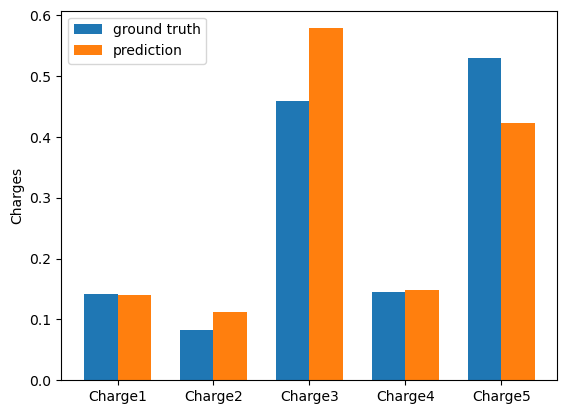

In [7]:
#4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['Charge1', 'Charge2', 'Charge3', 'Charge4', 'Charge5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## 2.5 Use the ridge regression model to do prediction

In [9]:
#2.5.1 Compare its performance on the testing set with that of the standard linear regression model

# Train the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_model.fit(X_train, y_train)

# Predictions using the Ridge regression model
ridge_predictions = ridge_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for the Ridge regression model
ridge_mse = mean_squared_error(y_test, ridge_predictions)

# Compare the performance
print("Mean Squared Error (MSE) for Ridge Regression:", ridge_mse)
print("Mean Squared Error (MSE) for Standard Linear Regression:", lr_mse)

Mean Squared Error (MSE) for Ridge Regression: 0.008272576669548306
Mean Squared Error (MSE) for Standard Linear Regression: 0.008270951713078177


In [11]:
# 2.5.2 Use different *lamda* to see how it affects the performance of the ridge regression model on the testing set

# Define a range of different alpha values to try
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

# Initialize lists to store MSE values for each alpha
mse_values = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Train the Ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predictions using the Ridge regression model
    ridge_predictions = ridge_model.predict(X_test)

    ridge_mse = mean_squared_error(y_test, ridge_predictions)
    
    # Append MSE value to the list
    mse_values.append(ridge_mse)

# Print the MSE values for different alpha values
for alpha, mse in zip(alpha_values, mse_values):
    print("Alpha:", alpha, "MSE:", mse)

Alpha: 0.001 MSE: 0.0082709533138101
Alpha: 0.01 MSE: 0.00827096772258419
Alpha: 0.1 MSE: 0.008271112026766074
Alpha: 1.0 MSE: 0.008272576669548306
Alpha: 10.0 MSE: 0.008289340687239471
